In [1]:
import os
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [2]:
# Dictionary that holds counts for words and unique words in every song

lyrics = defaultdict(dict)

words_per_song = defaultdict(dict)
unique_words_per_song = defaultdict(dict)

# Dictionary that holds counts for words per album
words_per_album = defaultdict(int)
unique_words_per_album = defaultdict(int)

# Dictionary that keeps track of the average number of words in a song per album
average_words_per_album = defaultdict(int)

# Dictionary that holds the number of songs per album
num_songs = {}

# Dictionary that holds the most used words in an album
album_most_used_words = defaultdict(list[str])

# Dictionary that holds the most used words in entire discography (to be plotted over albums and see how use changes)
most_used_words = list

# Iterates over all of the directories
for root, dirs, files in os.walk('Songs', topdown=True):

    for dir in dirs:
        for file in os.listdir(os.path.join("Songs/", dir)):
            title = os.path.join(f"Songs/{dir}", file)
            words = []
            with open(title) as t:
                word_list = []
                for line in t.readlines():
                    word_list.append(line.rstrip())
                lyrics[dir][os.path.basename(title)] = word_list
        


In [3]:
# List that holds all of the words in every song
all_words = []

for album, song in lyrics.items():

    # List that holds all of the words in a given album
    album_words = []

    # Saves the number of songs per album
    song_num = len(song.values())
    num_songs[album] = song_num

    # Set that saves the unique words in an album
    unique_words = set()

    # list which will store the most frequently appearing words across an album
    album_most_freq = defaultdict(int)

    for title, word_list in song.items():

        # Saves the number of words and unique words per song
        total_sum = len(word_list)
        unique_sum = len(set(word_list))
        words_per_song[album][title] = total_sum
        unique_words_per_song[album][title] = unique_sum

        # Saves the average length of a word in a song
        char_count = 0
        for word in word_list:
            char_count += len(word)
            album_words.append(word)
            all_words.append(word)

            # Updates the word count of a word in an album
            words_per_album[album] += 1
            unique_words.add(word)

        # averages the number of characters by the number of words in a song
        char_count = char_count / len(word_list)
        
        unique_words_per_album[album] = len(unique_words)

    counter = Counter(album_words)
    counter = counter.most_common(20)
    album_most_used_words[album] = counter

counter = Counter(all_words)
counter = counter.most_common(10)
most_used_words = counter

for album, sum in words_per_album.items():

    # saves the average number of words per song per album
    avg_per_album = sum/num_songs[album]
    average_words_per_album[album] = avg_per_album

In [4]:
print(most_used_words)

[('like', 704), ('know', 653), ('would', 503), ('love', 453), ('never', 442), ('want', 422), ('time', 418), ('one', 376), ('say', 341), ('back', 338)]


In [5]:
albums = ["Taylor Swift", "Fearless (Taylor's Version)", "Speak Now (Taylor's Version)", 
          "Red (Taylor's Version)", "1989 (Taylor's Version)", "reputation", "Lover", 
          "Midnights", "folklore", "evermore", "The Tortured Poets Department"]

shortenings = ["Debut", "Fearless", "Speak Now", 
          "Red", "1989", "rep", "Lover", 
          "Midnights", "folklore", "evermore", "TTPD"]

Text(0, 0.5, 'Number of Songs')

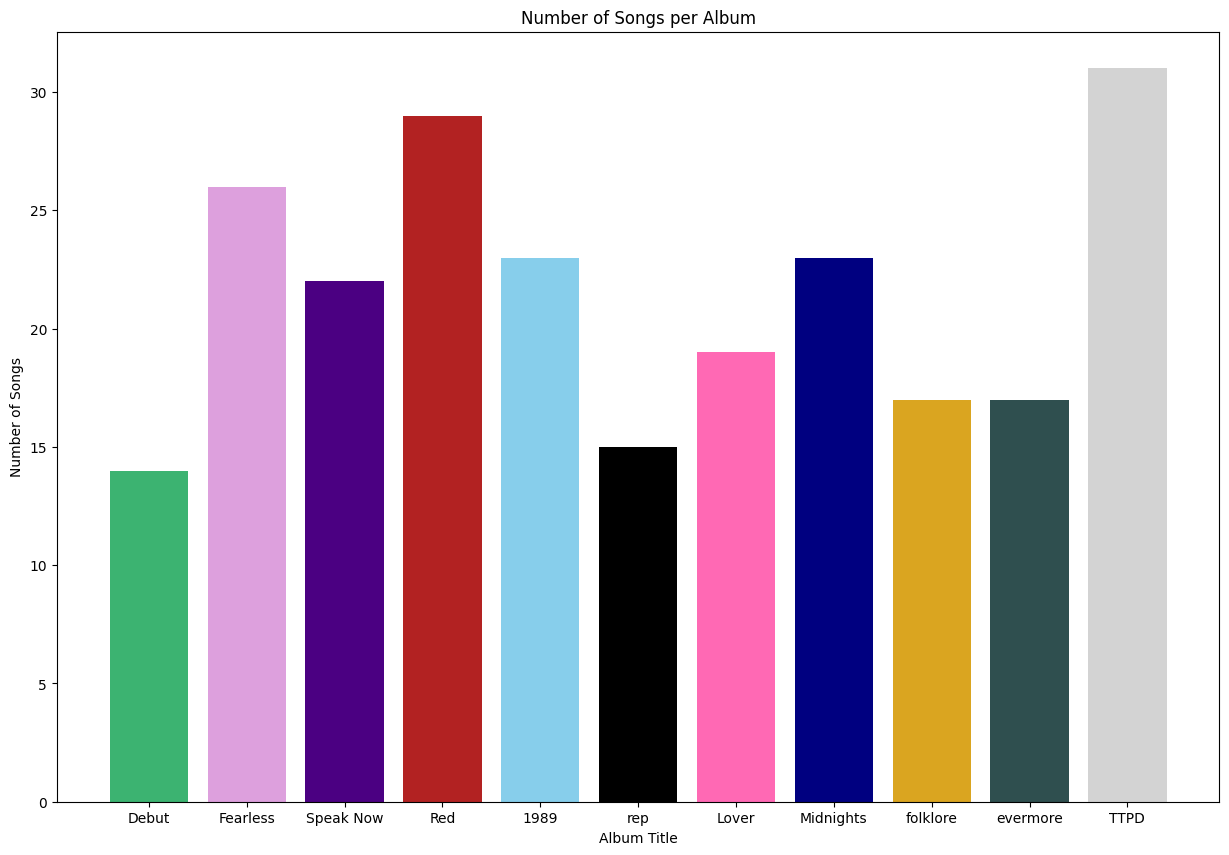

In [6]:
color = ['mediumseagreen', 'plum', 'indigo', 'firebrick', 'skyblue', 'black', 'hotpink', 'navy', 'goldenrod', 'darkslategrey', 'lightgrey']
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], num_songs[album], color=color[i])

plt.title("Number of Songs per Album")
plt.xlabel("Album Title")
plt.ylabel("Number of Songs")


Text(0, 0.5, 'Number of Words')

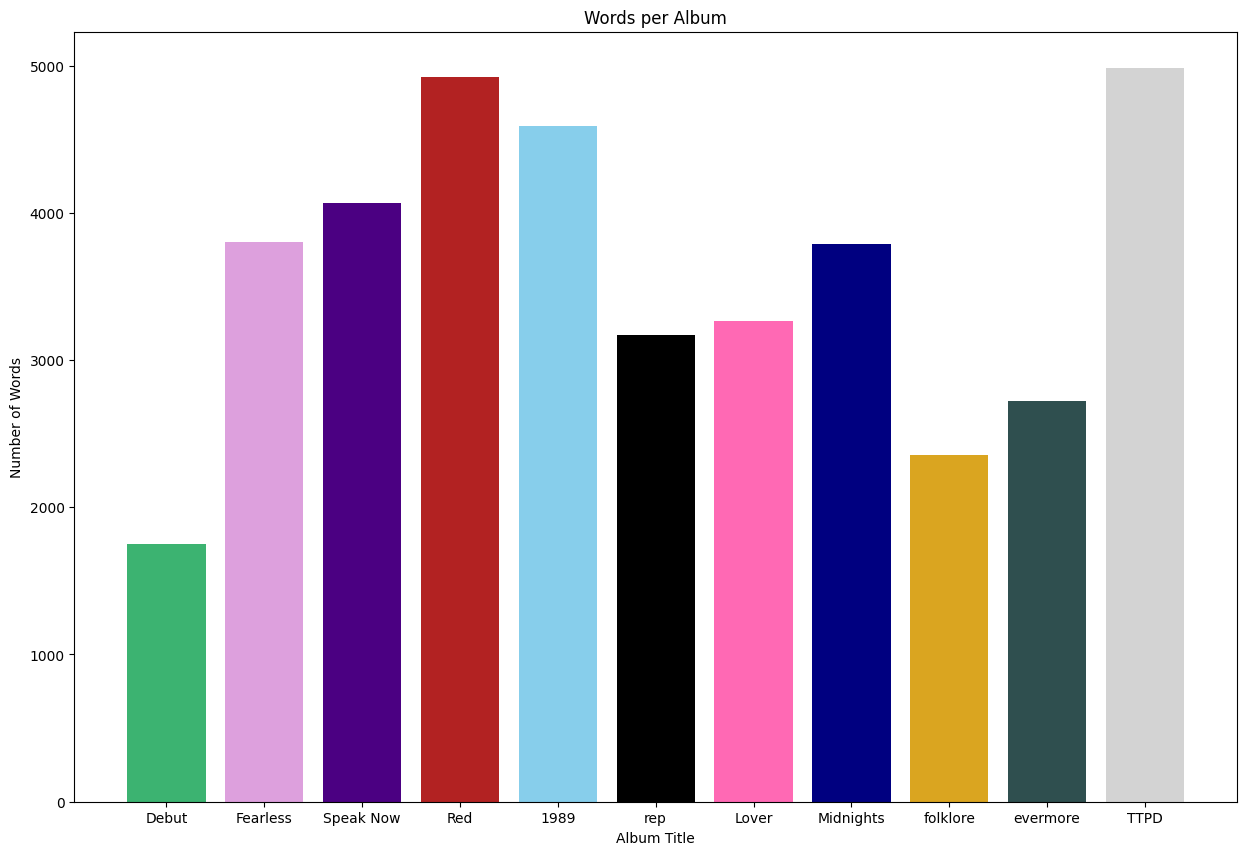

In [7]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], words_per_album[album], color=color[i])

plt.title("Words per Album")
plt.xlabel("Album Title")
plt.ylabel("Number of Words")

Text(0, 0.5, 'Unique Words')

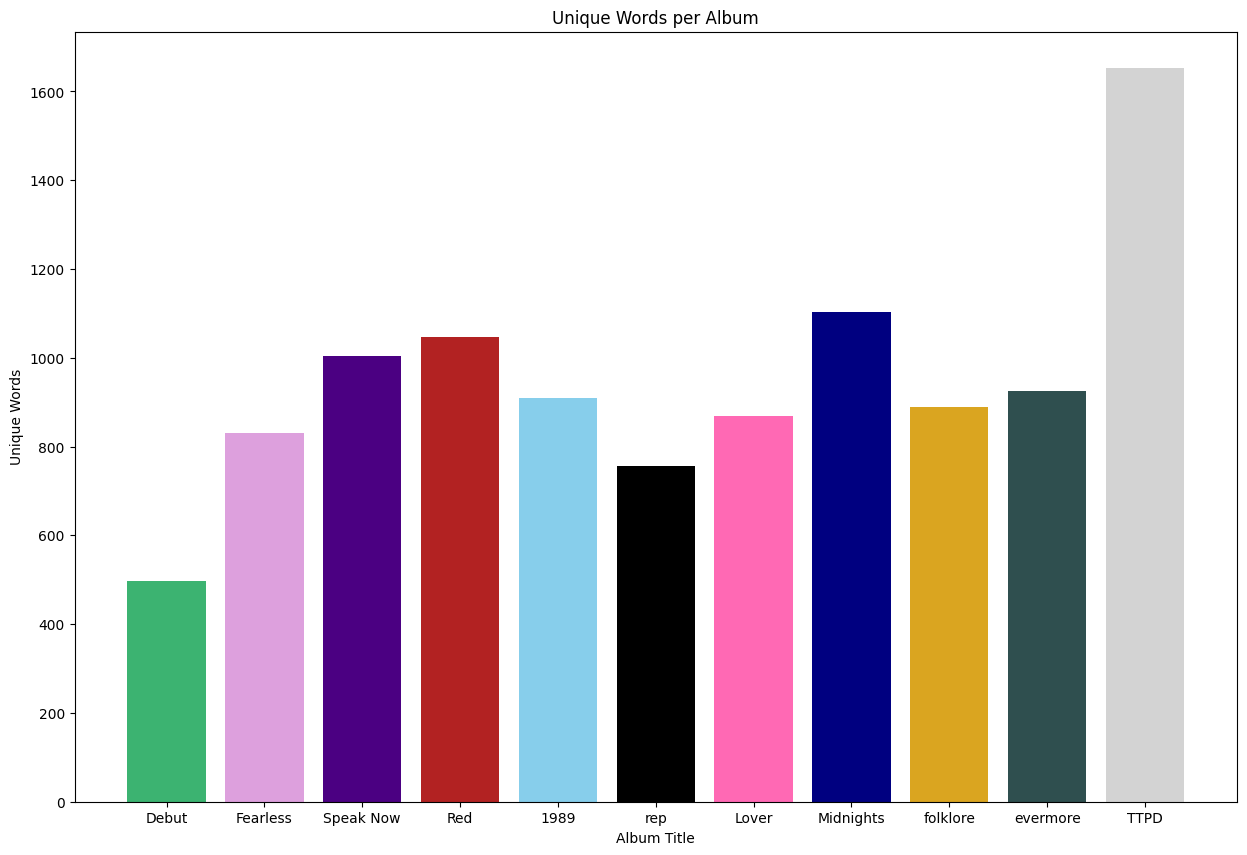

In [8]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], unique_words_per_album[album], color=color[i])

plt.title("Unique Words per Album")
plt.xlabel("Album Title")
plt.ylabel("Unique Words")

Text(0, 0.5, 'Number of  Words')

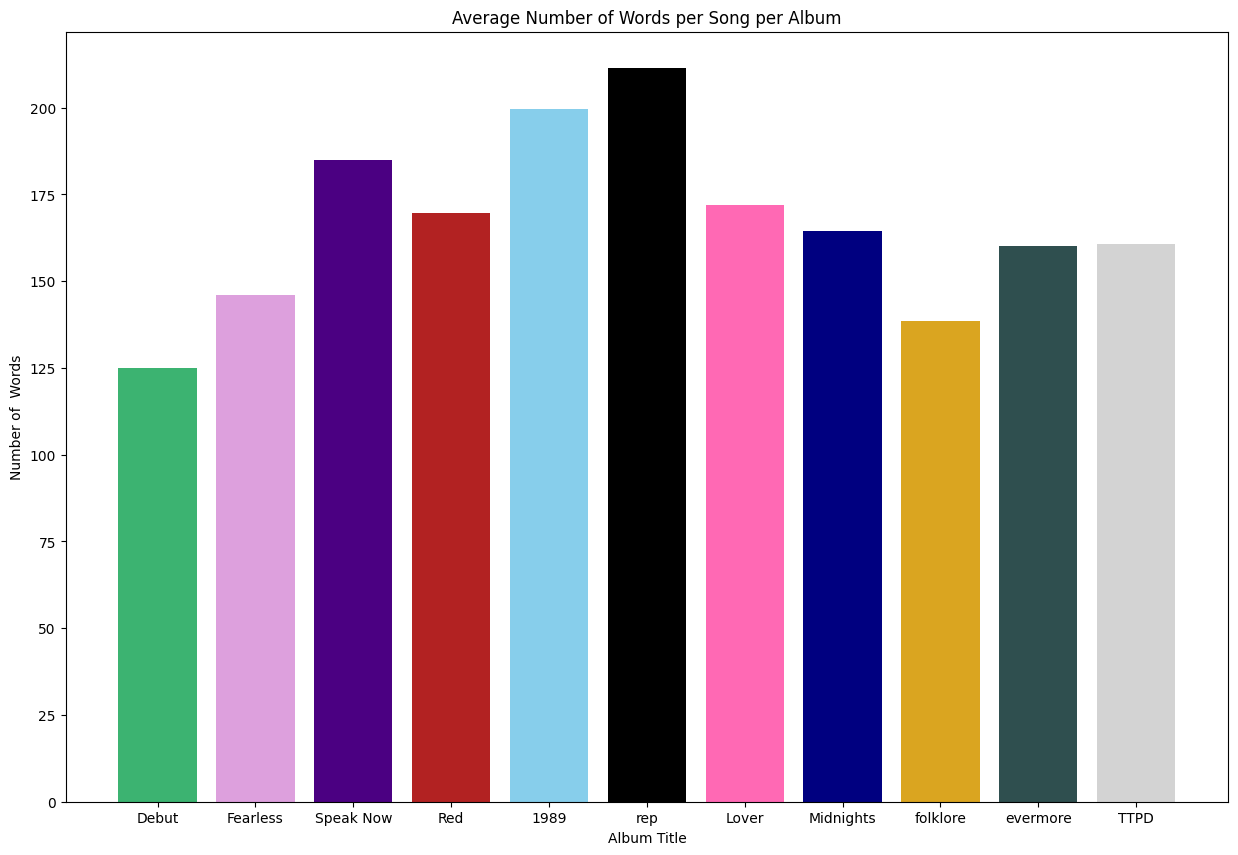

In [9]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], average_words_per_album[album], color=color[i])

plt.title("Average Number of Words per Song per Album")
plt.xlabel("Album Title")
plt.ylabel("Number of  Words")